# Exercise 12

### MNIST with Keras

The goal of exercise 12 is to use deep neural network models, implemented in the Keras python package, to recognize and distinguish between the ten handwritten digits (0-9).

The MNIST dataset comprises $70000$ handwritten digits, each of which comes in a square image, divided into a $28\times 28$ pixel grid. Every pixel can take on $256$ gradation of the gray color, interpolating between white and black, and hence each data point assumes any value in the set $\{0,1,\dots,255\}$. Since there are $10$ categories in the problem, corresponding to the ten digits, this problem represents a generic **classification task**. 

## Exercise 12.1

Change at will and train your DNN by increasing the number of epochs to an adeuqate value</span>. Try to use at least two other optimizers, different from SGD: watch to accuracy and loss for training and validation data and comment on the performances.

## Data loading and preprocessing

Import all the necessary libraries

In [13]:
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
import matplotlib.pyplot as plt
seed=0
np.random.seed(seed) # fix random seed
tf.random.set_seed(seed)

Import MNIST dataset and normalize the images: I decided to Flatten the images inside the model so to make it simple to visualizing them:

In [185]:
from keras.datasets import mnist

# input image dimensions
img_rows, img_cols = 28, 28 # number of pixels 
# output
num_classes = 10 # 10 digits

# the data, split between train and test sets
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# cast to floats
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')

# rescale data in interval [0,1]
train_images /= 255
test_images /= 255

#labels
digits = [str(i) for i in range(0,10)]


#one-hot encoding for the label names:
train_labels = keras.utils.to_categorical(train_labels, num_classes)
test_labels = keras.utils.to_categorical(test_labels, num_classes)

train = (train_images, train_labels)
validation = (test_images, test_labels)

I could define a simple function which helps me visualize my data:

In [52]:
def plot_sample(images, labels):
    """Plot utils."""
    plt.figure(figsize=(10,10))
    for i in range(36):
        plt.subplot(6, 6, i+1)
        plt.xticks([])
        plt.yticks([])
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(digits[np.argmax(labels[i]==1)])
    plt.show()

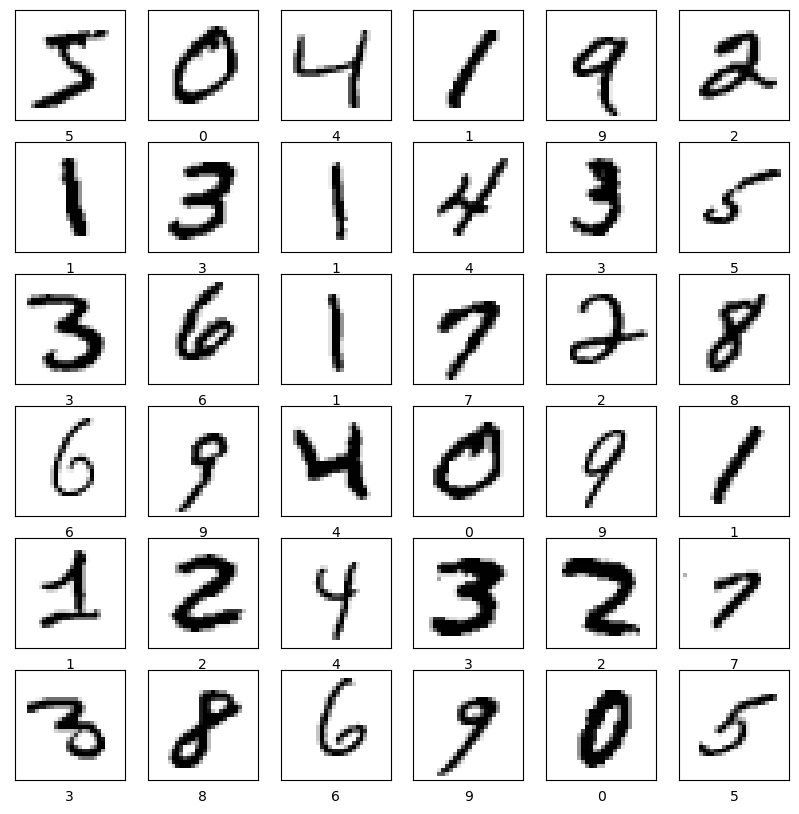

In [53]:
plot_sample(train_images, train_labels)

## Defining the model

Since I already implemented it in the last numerical exercise, I can use a slightly different version of my `Model` class:

In [103]:
class Model():
    
    #initialize
    def __init__(self, trainData, validationData):
        self.trainData = trainData
        self.validationData = validationData
    
    #set new data
    def set_data(self, trainData, validationData):
        self.trainData = trainData
        self.validationData = validationData
        
    # model which considers a single neuron
    def DenseModel(self):
        model = tf.keras.models.Sequential()
        #This layer flatten the matrix
        model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
        model.add(tf.keras.layers.Dense(units=784, activation='relu'))
        model.add(tf.keras.layers.Dense(units=98, activation='relu'))
        model.add(tf.keras.layers.Dropout(0.5))
        model.add(tf.keras.layers.Dense(units=10, activation='softmax'))
        self.model = model
        
    
    #it compiles every model
    def compile(self):
        self.model.compile(optimizer=tf.keras.optimizers.Adam(),loss="categorical_crossentropy", metrics=["accuracy"])
    
    # training
    def fit(self, EarlyStopping, patience, epochs, verbose='auto'):
        
        callbacks=[]
        
        if (EarlyStopping):
                early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=patience, mode='min')
                callbacks.append(early_stopping)
                print('Doing early stopping with patience =',patience)
                
        history = self.model.fit(x = self.trainData[0],
                                 y = self.trainData[1],
                                 batch_size = 32,
                                 epochs=epochs,
                                 shuffle = True,
                                 verbose = verbose,
                                 validation_data=(self.validationData[0], self.validationData[1]),
                                 callbacks=callbacks)
        
        return history
    
    #make a performance evaluation
    def evaluate(self):
        
        return self.model.evaluate(self.validationData[0], self.validationData[1], batch_size=32, verbose=0)
    
def plotHistory(history):
    
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='best')
    
    plt.subplot(1,2,2)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='best')
    
    plt.tight_layout()
    plt.show()

Therefore I could define, compile and train my model with 20 epochs and an EarlyStopping with patience 5:

In [96]:
ModelDNN = Model(train, validation)
ModelDNN.DenseModel()
ModelDNN.compile()
history = ModelDNN.fit(EarlyStopping=True, epochs = 20, patience=5 )

Doing early stopping with patience = 5
Epoch 1/20


2023-06-03 22:57:29.673402: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1869/1875 [============================>.] - ETA: 0s - loss: 0.2486 - accuracy: 0.9277

2023-06-03 22:57:45.620113: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 18s 10ms/step - loss: 0.2483 - accuracy: 0.9278 - val_loss: 0.1060 - val_accuracy: 0.9659
Epoch 2/20
1875/1875 [==============================] - 18s 9ms/step - loss: 0.1060 - accuracy: 0.9692 - val_loss: 0.0907 - val_accuracy: 0.9726
Epoch 3/20
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0752 - accuracy: 0.9778 - val_loss: 0.0838 - val_accuracy: 0.9767
Epoch 4/20
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0590 - accuracy: 0.9819 - val_loss: 0.0712 - val_accuracy: 0.9796
Epoch 5/20
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0470 - accuracy: 0.9859 - val_loss: 0.0697 - val_accuracy: 0.9812
Epoch 6/20
1875/1875 [==============================] - 18s 9ms/step - loss: 0.0376 - accuracy: 0.9884 - val_loss: 0.0737 - val_accuracy: 0.9814
Epoch 7/20
1875/1875 [==============================] - 18s 10ms/step - loss: 0.0366 - accuracy: 0.9889 - val_loss: 0.0802 - val_accuracy: 

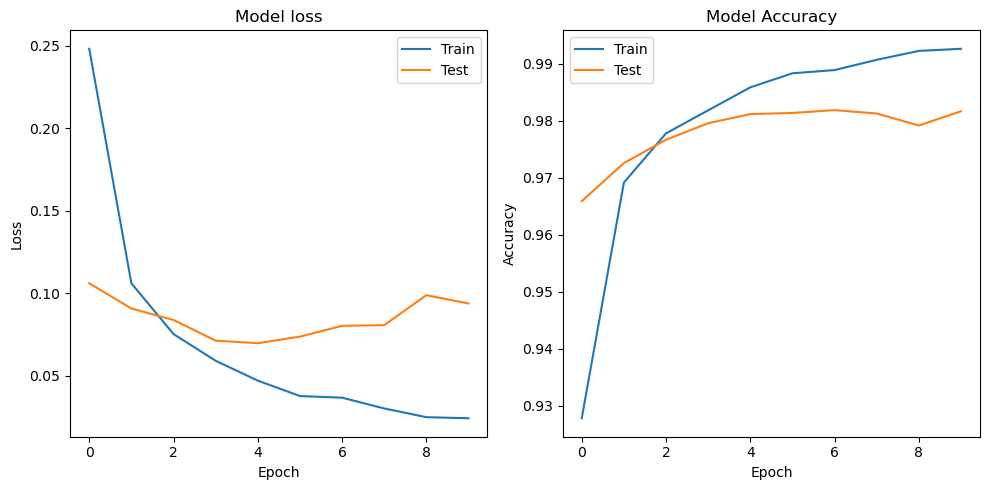

In [98]:
plotHistory(history)

From the training history shown above it is clear how the model is able of learning to categorize the hand written digits of the train dataset: as a matter of fact the Train loss decreases over the epochs as well as it's accuracy increases. At the same time, the model ability of generalizing stops after few epochs: it's loss starts to increase describing a situation where the model is beginning to learn by heart the training set while is not performing better when a new image is fed into the network.

The following is an evaluation of the model and a prediction example:

313/313 [==============================] - 2s 8ms/step - loss: 0.0938 - accuracy: 0.9817
Test set loss: 0.09376926720142365
Test set accuracy: 0.9817000031471252
313/313 [==============================] - 1s 2ms/step


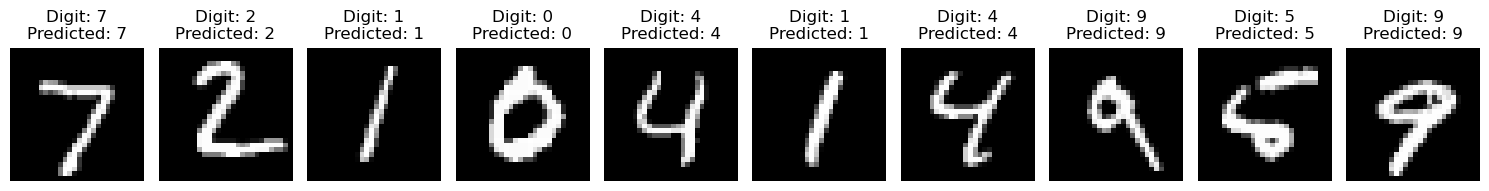

In [127]:
test_loss, test_acc = ModelDNN.model.evaluate(test_images, test_labels)
print("Test set loss:", test_loss)
print("Test set accuracy:", test_acc)

predictions = ModelDNN.model.predict(test_images)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(test_images[i, :, :], cmap='gray')    
    plt.title("Digit: {}\nPredicted: {}".format(np.argmax(test_labels[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
    plt.tight_layout()
plt.show()

#### Creating Convolutional Neural Nets with Keras

We have so far considered each MNIST data sample as a $(28\times 28,)$-long 1d vector. On the other hand, we do know that in every one of the hand-written digits there are *local* spatial correlations between the pixels, but also *translational invariance*, which we would like to take advantage of to improve the accuracy of our classification model. To this end, we first need to reshape the training and test input data as follows

## Exercise 12.2

Change the architecture of your DNN using convolutional layers. Use `Conv2D`, `MaxPooling2D`, `Dropout`, but also do not forget `Flatten`, a standard `Dense` layer and `soft-max` in the end. I have merged step 2 and 3 in the following definition of `create_CNN()` that **you should complete**:

Once again, I can add this type of architecture to my `Model` class:

In [129]:
class Model():
    
    #initialize
    def __init__(self, trainData, validationData):
        self.trainData = trainData
        self.validationData = validationData
    
    #set new data
    def set_data(self, trainData, validationData):
        self.trainData = trainData
        self.validationData = validationData
        
    # model which considers a single neuron
    def DenseModel(self):
        model = tf.keras.models.Sequential()
        #This layer flattens the matrix
        model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
        model.add(tf.keras.layers.Dense(units=784, activation='relu'))
        model.add(tf.keras.layers.Dense(units=98, activation='relu'))
        model.add(tf.keras.layers.Dropout(0.5))
        model.add(tf.keras.layers.Dense(units=10, activation='softmax'))
        self.model = model
    
    def CNNModel(self):
        model = tf.keras.models.Sequential()
        #Let'add a 2DConv layer: where 10 filters is because of the numbers of features i want to extract
        model.add(Conv2D(10, kernel_size=(5, 5),activation='relu',input_shape=input_shape))
        model.add(tf.keras.layers.MaxPooling2D((2,2)))
        #Increasing the number of filters is benificial event though i only have 10 features: it helps the discriminative power
        #of my model in situations where the same digit is written in a slightly different way, orientation, thickness and so on
        model.add(tf.keras.layers.Conv2D(32, 5, activation='relu'))
        model.add(tf.keras.layers.MaxPooling2D((2,2)))
        model.add(tf.keras.layers.Flatten())
        model.add(tf.keras.layers.Dense(128, activation='relu'))
        model.add(tf.keras.layers.Dropout(0.5))
        model.add(tf.keras.layers.Dense(units=10, activation='softmax'))
        self.model = model
        

    
    #it compiles every model
    def compile(self):
        self.model.compile(optimizer=tf.keras.optimizers.Adam(),loss="categorical_crossentropy", metrics=["accuracy"])
    
    # training
    def fit(self, EarlyStopping, patience, epochs, verbose='auto'):
        
        callbacks=[]
        
        if (EarlyStopping):
                early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=patience, mode='min')
                callbacks.append(early_stopping)
                print('Doing early stopping with patience =',patience)
                
        history = self.model.fit(x = self.trainData[0],
                                 y = self.trainData[1],
                                 batch_size = 32,
                                 epochs=epochs,
                                 shuffle = True,
                                 verbose = verbose,
                                 validation_data=(self.validationData[0], self.validationData[1]),
                                 callbacks=callbacks)
        
        return history
    
    #make a performance evaluation
    def evaluate(self):
        
        return self.model.evaluate(self.validationData[0], self.validationData[1], batch_size=32, verbose=0)
    
def plotHistory(history):
    
    plt.figure(figsize=(10,5))
    plt.subplot(1,2,1)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='best')
    
    plt.subplot(1,2,2)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='best')
    
    plt.tight_layout()
    plt.show()

In [130]:
ModelCNN = Model(train, validation)
ModelCNN.CNNModel()
ModelCNN.compile()
history = ModelCNN.fit(EarlyStopping=True, epochs = 20, patience=5 )


Doing early stopping with patience = 5
Epoch 1/20


2023-06-03 23:37:37.924806: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - ETA: 0s - loss: 0.1934 - accuracy: 0.9413

2023-06-03 23:38:00.238973: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 25s 12ms/step - loss: 0.1934 - accuracy: 0.9413 - val_loss: 0.0440 - val_accuracy: 0.9857
Epoch 2/20
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0620 - accuracy: 0.9812 - val_loss: 0.0365 - val_accuracy: 0.9884
Epoch 3/20
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0458 - accuracy: 0.9859 - val_loss: 0.0261 - val_accuracy: 0.9918
Epoch 4/20
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0379 - accuracy: 0.9887 - val_loss: 0.0295 - val_accuracy: 0.9904
Epoch 5/20
1875/1875 [==============================] - 23s 12ms/step - loss: 0.0314 - accuracy: 0.9907 - val_loss: 0.0307 - val_accuracy: 0.9900
Epoch 6/20
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0257 - accuracy: 0.9918 - val_loss: 0.0256 - val_accuracy: 0.9914
Epoch 7/20
1875/1875 [==============================] - 22s 12ms/step - loss: 0.0236 - accuracy: 0.9924 - val_loss: 0.0292 - val_accura

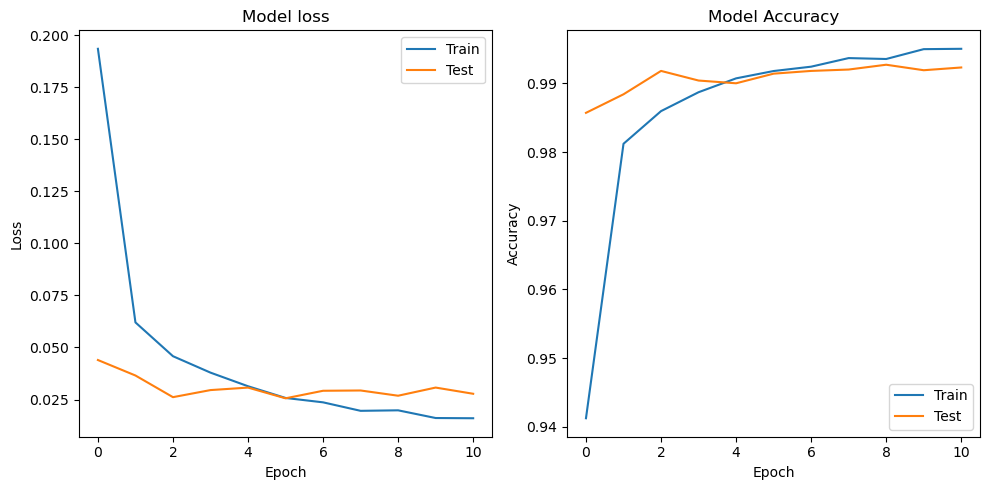

In [131]:
plotHistory(history)

313/313 [==============================] - 2s 8ms/step - loss: 0.0278 - accuracy: 0.9923
Test set loss: 0.027760274708271027
Test set accuracy: 0.9922999739646912
 68/313 [=====>........................] - ETA: 0s

2023-06-03 23:44:13.874392: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 2ms/step


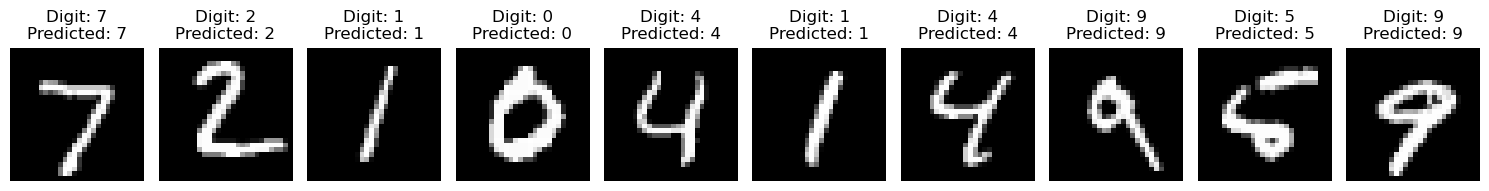

In [132]:
test_loss, test_acc = ModelCNN.model.evaluate(test_images, test_labels)
print("Test set loss:", test_loss)
print("Test set accuracy:", test_acc)

predictions = ModelCNN.model.predict(test_images)

plt.figure(figsize=(15, 15)) 
for i in range(10):    
    ax = plt.subplot(2, 10, i + 1)    
    plt.imshow(test_images[i, :, :], cmap='gray')    
    plt.title("Digit: {}\nPredicted: {}".format(np.argmax(test_labels[i]), np.argmax(predictions[i])))    
    plt.axis('off') 
    plt.tight_layout()
plt.show()

After all, this new architecture improved the accuracy of my model of $1\%$, bringing it to $99\%$

## Exercise 12.3

Use the `gimp` application to create 10 pictures of your "handwritten" digits, import them in your jupyter-notebook and try to see if your CNN is able to recognize your handwritten digits.

For example, you can use the following code to import a picture of an handwritten digit
(Note: you should install Python Image Library (PIL/Pillow):

In [182]:
train[1].shape

(60000, 10)

I can construct a test set out of my home-made digts and use it to compare model performances over it:

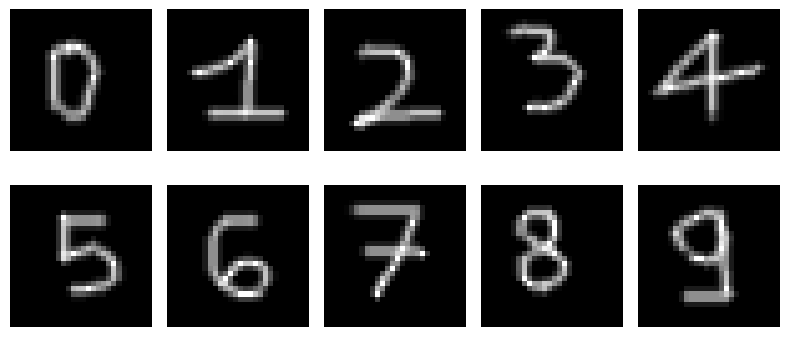

(28, 28)
Image size: 28x28


In [190]:
from PIL import Image
import os

#Test array
testImages = np.zeros((10, 28, 28))
testLabels = np.zeros((10))

plt.figure(figsize=(8,4))
for i in range(0,10):
    
    digit_filename = f"./pictures/{i}b.png"
    digit_in = Image.open(digit_filename).convert('L')

    ydim, xdim = digit_in.size

    pix=digit_in.load();
    data = np.zeros((xdim, ydim))
    for j in range(ydim):
        for h in range(xdim):
            data[h,j]=pix[j,h]

    data /= 255
    
    testImages[i]=data
    testLabels[i]=i
    
    plt.subplot(2,5,i+1)
     
    plt.imshow(data, cmap='gray')    
    plt.axis('off') 

plt.tight_layout()
plt.show()

print(data.shape)
print("Image size: "+str(xdim)+"x"+str(ydim))

Now I need to perform a one-hot encoding of my labels:


In [191]:
#labels
digits = [str(i) for i in range(0,10)]
num_classes=10

#one-hot encoding for the label names:
testLabels = keras.utils.to_categorical(testLabels, num_classes)
testLabels

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

Now I can evaluate model performances over this set:

In [192]:
test_loss, test_acc = ModelCNN.model.evaluate(testImages, testLabels)
print("Test set loss CNN-Model:", test_loss)
print("Test set accuracy CNN-Model:", test_acc)

test_loss, test_acc = ModelDNN.model.evaluate(testImages, testLabels)
print("Test set loss DNN-Model:", test_loss)
print("Test set accuracy DNN-Model:", test_acc)

CNNpredictions = ModelCNN.model.predict(testImages)
DNNpredictions = ModelDNN.model.predict(testImages)

1/1 [==============================] - 0s 134ms/step - loss: 0.4055 - accuracy: 0.9000
Test set loss CNN-Model: 0.40550556778907776
Test set accuracy CNN-Model: 0.8999999761581421
1/1 [==============================] - 0s 104ms/step - loss: 1.6765 - accuracy: 0.5000
Test set loss DNN-Model: 1.6764743328094482
Test set accuracy DNN-Model: 0.5
1/1 [==============================] - 0s 19ms/step


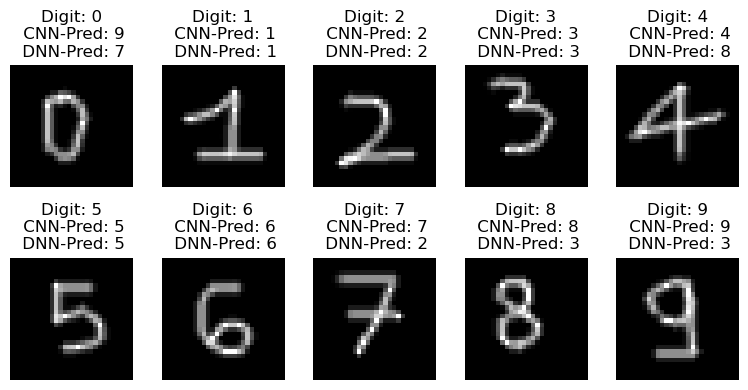

In [196]:
plt.figure(figsize=(8,4))

for i in range(0,10):
    plt.subplot(2, 5, i + 1)    
    plt.imshow(testImages[i, :, :], cmap='gray')    
    plt.title("Digit: {}\n CNN-Pred: {}\n DNN-Pred: {}".format(np.argmax(testLabels[i]), np.argmax(CNNpredictions[i]), np.argmax(DNNpredictions[i])))    
    plt.axis('off') 
    plt.tight_layout()
plt.show()


Clearly, here the CNN model outperforms the DNN model